In [34]:
import numpy as np
import operator
import time
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [35]:
points_dataset=np.loadtxt('./dataset/dataset/twitter_1000000.txt')
points=points_dataset[:10000,1:]

In [39]:
np.random.seed(1)
k=20

disks={}
expanded_disks={}
inverse_disks={}
inverse_expanded_disks={}

distances=distance.cdist(points, points, 'euclidean')
r=np.percentile(distances[np.triu_indices(len(distances),1)],5)

378 1591 1833


<Figure size 432x288 with 0 Axes>

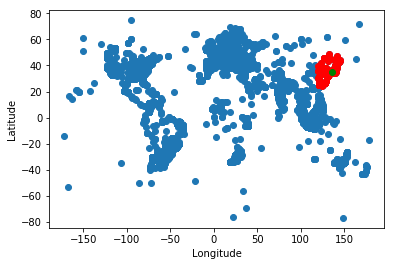

1517 854 1886


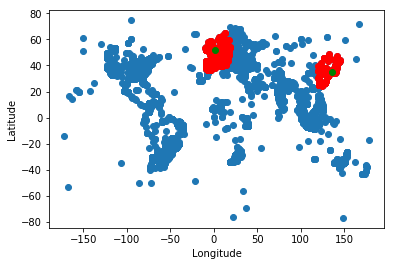

1722 733 1111


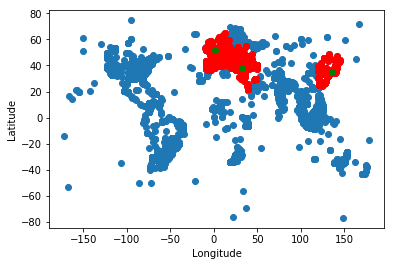

460 680 1541


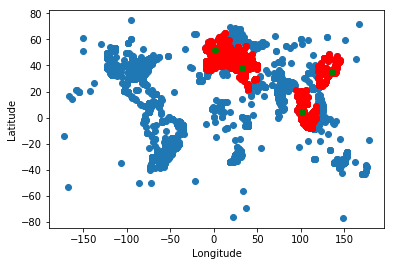

5260 539 862


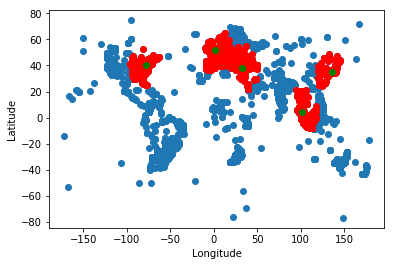

3068 327 513


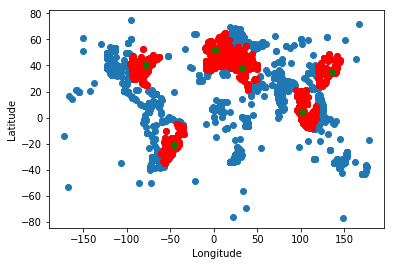

1537 304 404


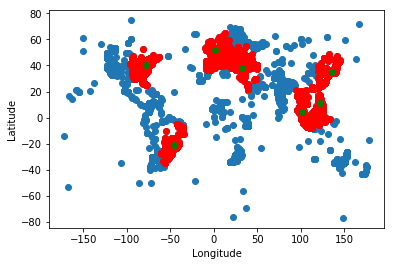

4845 134 151


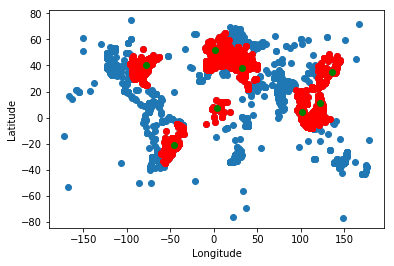

231 115 166


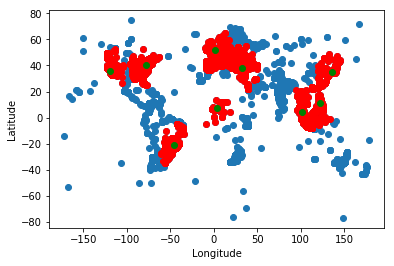

700 113 139


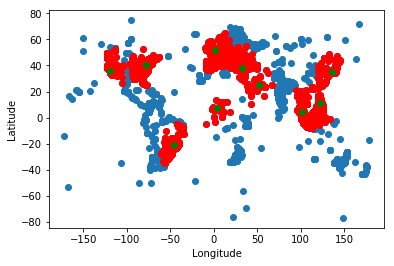

5264 100 144


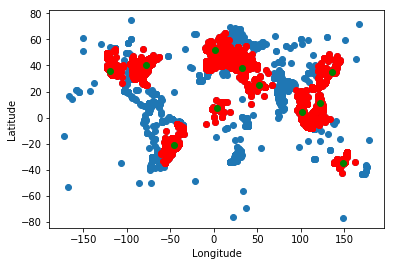

3298 88 194


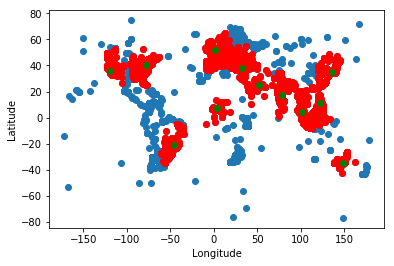

1013 74 123


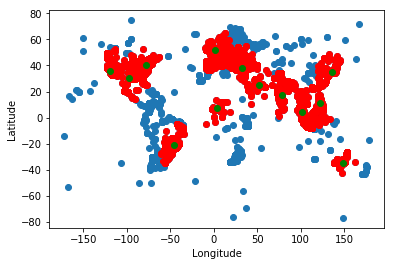

5299 70 174


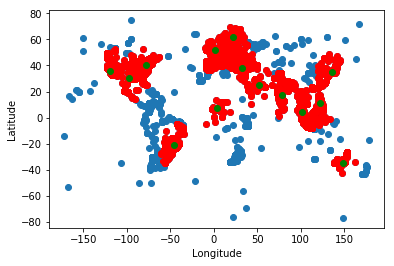

6965 69 171


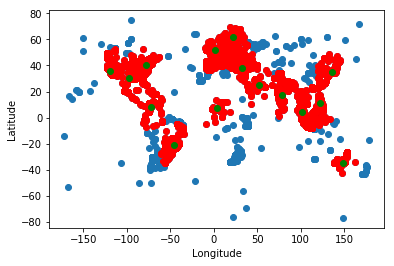

414 67 95


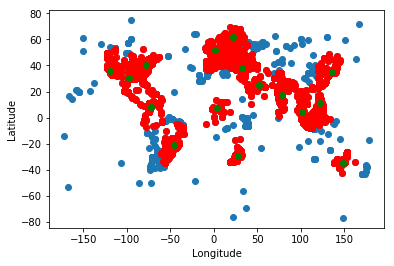

4276 55 120


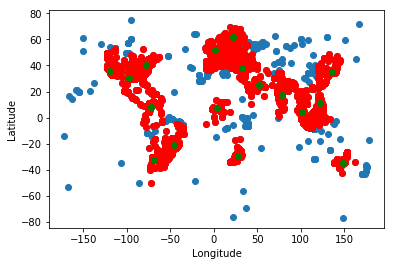

817 41 73


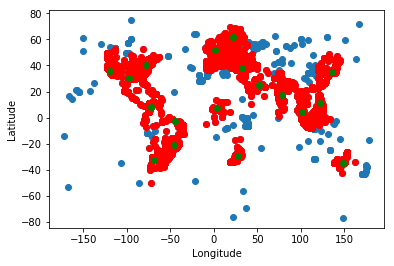

138 35 39


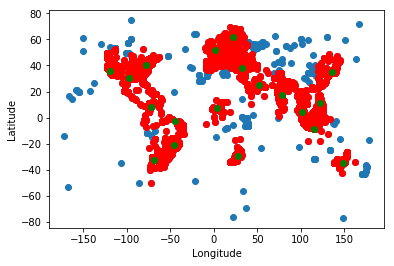

6329 33 35


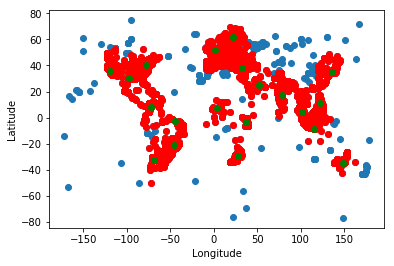

In [40]:
for i in range(0,points.shape[0]):
    expanded_disks[i]=np.argwhere(distances[i]<3*r).reshape(-1).tolist()
    disks[i]=np.argwhere(distances[i]<r).reshape(-1).tolist()
    for j in expanded_disks[i]:
        if j not in inverse_expanded_disks:
            inverse_expanded_disks[j]=[i]
        else:
            inverse_expanded_disks[j].append(i)
    for j in disks[i]:
        if j not in inverse_disks:
            inverse_disks[j]=[i]
        else:
            inverse_disks[j].append(i)

centers=[]
plt.clf()
covered_points=[]
for i in range(0,k):
    max_index=max(disks, key=lambda x:len(disks[x]))
    print(max_index,len(disks[max_index]),len(expanded_disks[max_index]))
    centers.append(max_index)
#     print(expanded_disks[max_index])
    covered_points+=expanded_disks[max_index]
    for j in expanded_disks[max_index]:
        for f in inverse_disks[j]:
            disks[f].remove(j)
        for f in inverse_expanded_disks[j]:
            if f!=max_index:
                expanded_disks[f].remove(j)
    del disks[max_index]
    del expanded_disks[max_index]
    
    fig, ax = plt.subplots()
    ax.scatter(points[:,0],points[:,1])
    ax.scatter(points[covered_points,0],points[covered_points,1],c="r")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    for i in centers:
        plt.scatter(points[i,0],points[i,1],c="green")
    plt.show()